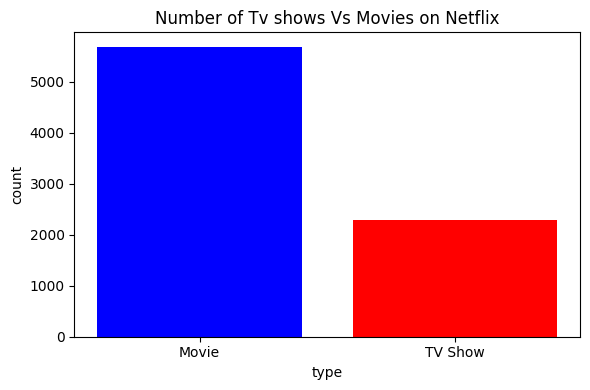

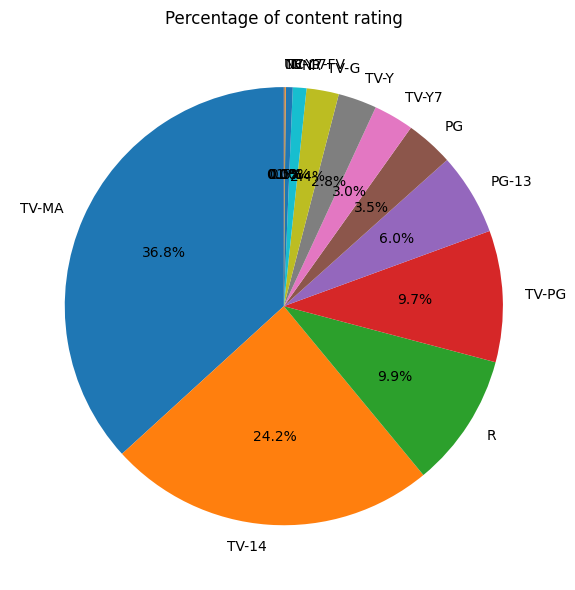

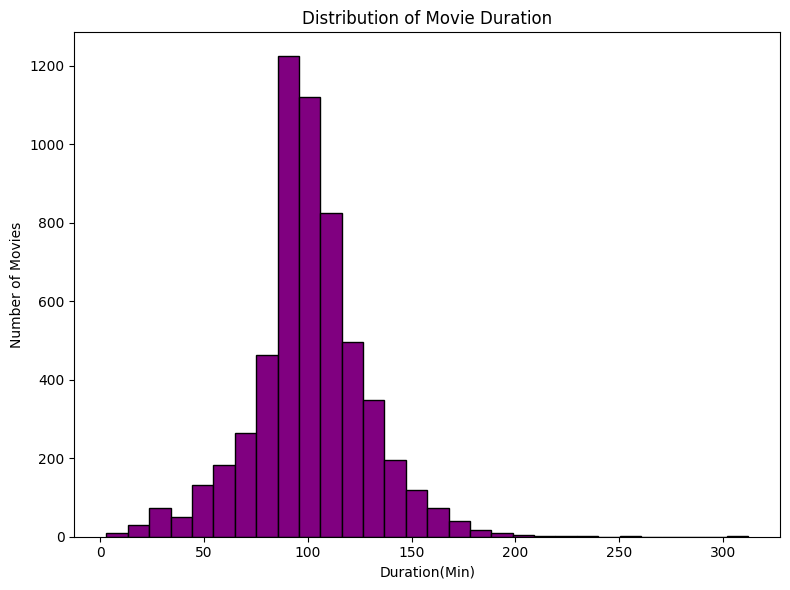

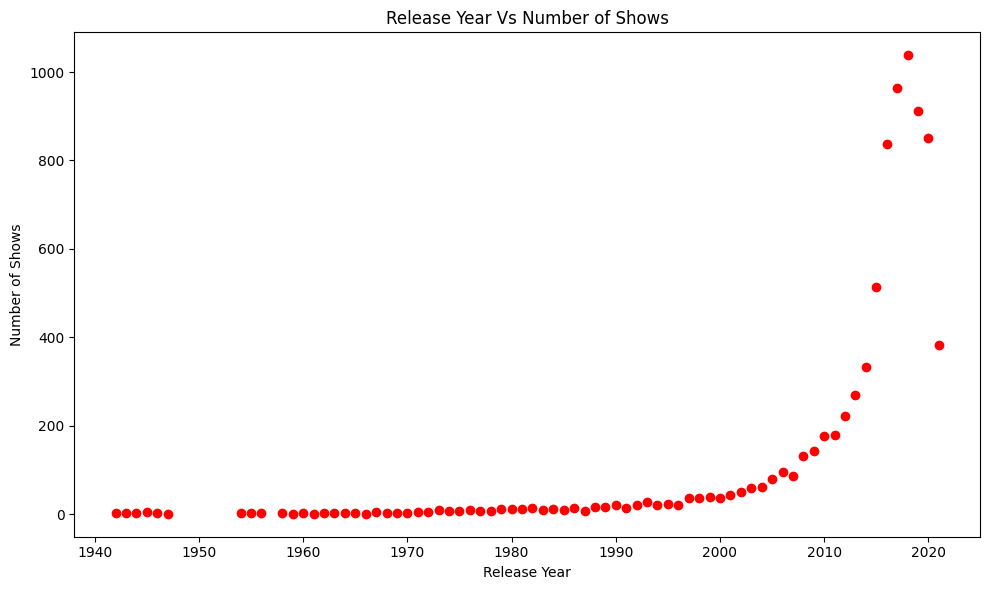

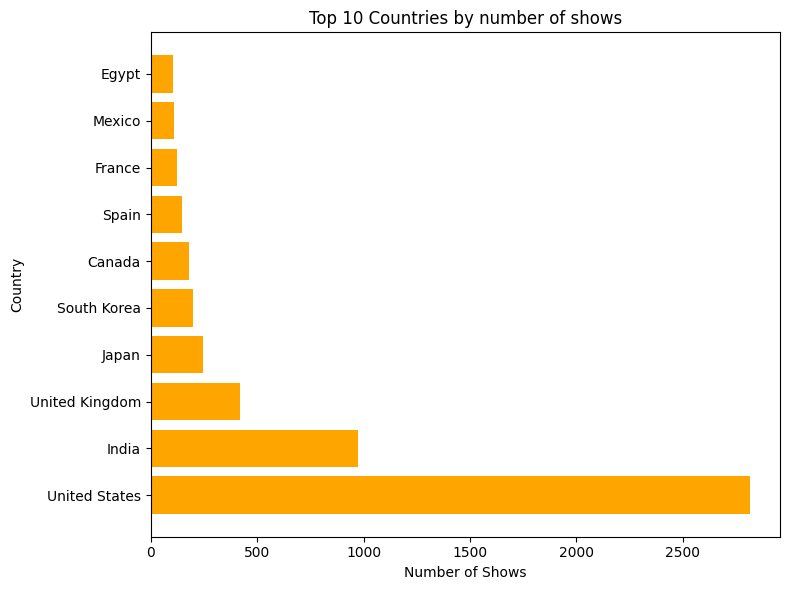

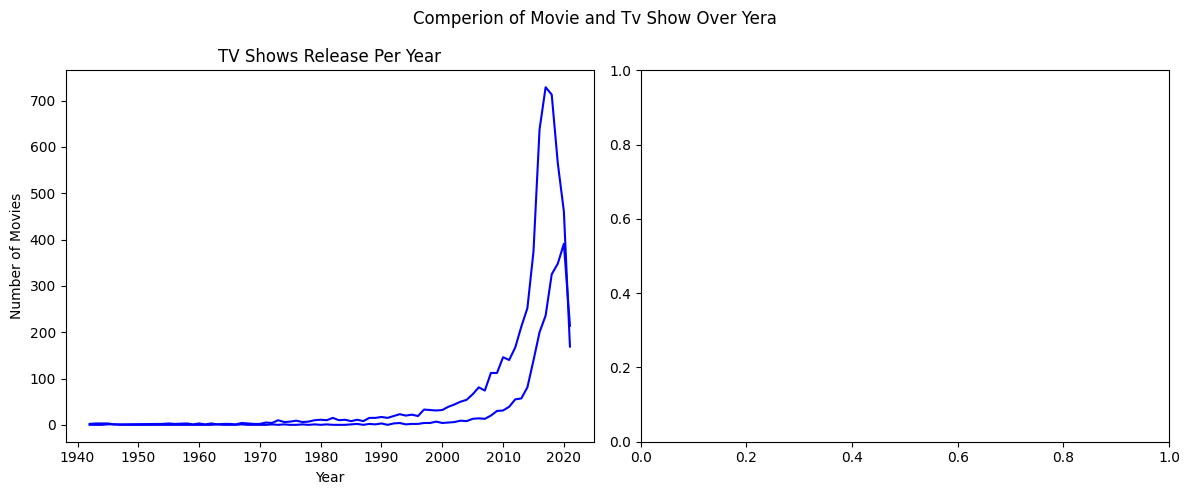

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# load file
df = pd.read_csv('netflix_titles.csv')

# clean data
df = df.dropna(subset = ['title','release_year','rating','country','duration'])

type_count = df['type'].value_counts()
plt.figure(figsize = (6,4))
plt.bar(type_count.index, type_count.values, color =['blue','red'])
plt.title('Number of Tv shows Vs Movies on Netflix')
plt.xlabel('type')
plt.ylabel('count')
plt.tight_layout()
plt.savefig('Movie_Vs_Tvshows.png')
plt.show()

rating_count = df['rating'].value_counts()
plt.figure(figsize = (8,6))
plt.pie(rating_count, labels = rating_count.index, autopct="%1.1f%%", startangle = 90)
plt.title('Percentage of content rating')
plt.tight_layout()
plt.savefig('Content_Rating_Pie.png')
plt.show()

movie_df = df[df['type'].str.lower() == 'movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.extract(r'(\d+)').astype(int)

plt.figure(figsize = (8,6))
plt.hist(movie_df['duration_int'], bins= 30, color = 'purple', edgecolor = 'black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration(Min)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('Movie_duration_histogram.png')
plt.show()

release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize = (10,6))
plt.scatter(release_counts.index, release_counts.values, color ='red')
plt.title('Release Year Vs Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show()

country_counts = df['country'].value_counts().head(10)
plt.figure(figsize = (8,6))
plt.barh(country_counts.index, country_counts.values, color = 'orange')
plt.title('Top 10 Countries by number of shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('Top10_counrtries.png')
plt.show()

content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1, 2, figsize = (12,5))

#first subplot:Movie
ax[0].plot(content_by_year.index, content_by_year['Movie'], color = 'blue')
ax[0].set_title('Movies Release Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

#second subplot: TV Shows
ax[0].plot(content_by_year.index, content_by_year['TV Show'], color = 'blue')
ax[0].set_title('TV Shows Release Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

fig.suptitle('Comperion of Movie and Tv Show Over Yera')

plt.tight_layout()
plt.savefig('Movie_TvShows_Comperion.png')
plt.show()